In [335]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Supposons un reseau simple : de type one_net d architecture 2 5 1
avec une activation relu : 2 5 (relu) 1 (relu)

In [336]:
#W1 = np.array([[2,0,-3,-1,2],[-1,0,2,1,-2]]).T
W1 = np.array([[-1,1,1,-4,3],[1,-3,2,1,2]]).T
W1


In [338]:
#b1 = np.array([2,0,-3,+4,2]).reshape(5,1)
b1 = np.array([1,-1,2,0,-2]).reshape(5,1)

In [4]:
#W2= np.array([-1,-2,0,1,3]).reshape(1,-1)
W2= np.array([1,2,1,-1,-3]).reshape(1,-1)
W2

array([[ 1,  2,  1, -1, -3]])

In [5]:
#b2 = np.array([2])
b2 = np.array([0])
b2

array([0])

In [6]:
def decompose(w):
    return (w+abs(w))/2,(-w+abs(w))/2
def G1(x):
    return decompose(W1)[1].dot(x)
def H1(x):
    return decompose(W1)[0].dot(x)+b1
def F1(x):
    return np.maximum(G1(x),H1(x))
def NU1(x):
    return F1(x)-G(x)

In [7]:
PG1 = np.concatenate((decompose(W1)[1],0*b1.reshape(-1,1)),axis=1)
PH1 = np.concatenate((decompose(W1)[0],b1.reshape(-1,1)),axis=1)
PF1 = np.stack((PG1,PH1),axis=1)

In [8]:
PF1,PF1.shape

(array([[[ 1.,  0.,  0.],
         [ 0.,  1.,  1.]],
 
        [[ 0.,  3.,  0.],
         [ 1.,  0., -1.]],
 
        [[ 0.,  0.,  0.],
         [ 1.,  2.,  2.]],
 
        [[ 4.,  0.,  0.],
         [ 0.,  1.,  0.]],
 
        [[ 0.,  0.,  0.],
         [ 3.,  2., -2.]]]), (5, 2, 3))

ATTENTION : ici PG1_i et PH1_i sont des points et PF1_i un segment

deuxieme couche derniere couche, une sortie, c est donc relativement facile

In [9]:
H2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PF1[i]= PF1[i] * decompose(W2)[1][0][i]
H2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    H2_PG1[i]= PG1[i] * decompose(W2)[0][0][i]
G2_PF1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PF1[i]= PF1[i] * decompose(W2)[0][0][i]
G2_PG1 = np.zeros((5,2,3)) 
for i in range(5): 
    G2_PG1[i]= PG1[i] * decompose(W2)[1][0][i]

In [10]:
H2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        H2.append(PF1[i] * decompose(W2)[1][0][i])
        print('f',i+1,decompose(W2)[1][0][i])
    else:
        H2.append(PG1[i] * decompose(W2)[0][0][i])
        print('g',i+1,decompose(W2)[0][0][i])

g 1 1.0
g 2 2.0
g 3 1.0
f 4 1.0
f 5 3.0


In [11]:
G2 = []
for i in range(5):
    if decompose(W2)[1][0][i] !=0:
        G2.append(PG1[i] * decompose(W2)[1][0][i])
        print('g',i+1,decompose(W2)[1][0][i])
    else:
        G2.append(PF1[i] * decompose(W2)[0][0][i])
        print('f',i+1,decompose(W2)[0][0][i])

f 1 1.0
f 2 2.0
f 3 1.0
g 4 1.0
g 5 3.0


In [15]:
def Mink(l):
    a = sep(l[0])
    liste = l[1:]
    t = len(a)
    for i in liste:
        print(t,'t')
        if len(i.shape) == 1:
            print('loop 1')
            p=[]
            for j in a:
                p.append(j+i)
                
            a = p[:]    
        else:
            print('loop 2')
            p = []
            t = t*i.shape[0]
            for k in range(i.shape[0]):
                for j in a:
                    p.append(j+i[k])
            
            a = p[:] 
        
    print(len(a),t)
                
    return a
            


In [16]:
def clean(l):
    a=[]
    for i in l:
        if np.count_nonzero(i)>0:
            a.append(i)
            
    return a
            


In [17]:
def sep(el):
    a=[]
    if len(el.shape)==1:
        return [el]
    else :
        for k in range(el.shape[0]):
            a.append(el[k])
        return a
            
        
    

In [18]:
Mink(clean(G2))

2 t
loop 2
4 t
loop 2
8 t
loop 1
8 8


[array([5., 6., 0.]),
 array([4., 7., 1.]),
 array([ 7.,  0., -2.]),
 array([ 6.,  1., -1.]),
 array([6., 8., 2.]),
 array([5., 9., 3.]),
 array([8., 2., 0.]),
 array([7., 3., 1.])]

In [19]:
Mink(clean(H2))

1 t
loop 1
1 t
loop 2
2 t
loop 2
4 4


[array([5., 6., 0.]),
 array([1., 7., 0.]),
 array([14., 12., -6.]),
 array([10., 13., -6.])]

In [20]:
F2 = Mink(clean(H2))+ Mink(clean(G2))
F2

1 t
loop 1
1 t
loop 2
2 t
loop 2
4 4
2 t
loop 2
4 t
loop 2
8 t
loop 1
8 8


[array([5., 6., 0.]),
 array([1., 7., 0.]),
 array([14., 12., -6.]),
 array([10., 13., -6.]),
 array([5., 6., 0.]),
 array([4., 7., 1.]),
 array([ 7.,  0., -2.]),
 array([ 6.,  1., -1.]),
 array([6., 8., 2.]),
 array([5., 9., 3.]),
 array([8., 2., 0.]),
 array([7., 3., 1.])]

In [150]:
tupled_lst = set(map(tuple, F2))
lst = map(list, tupled_lst)

In [160]:
FF = list(set(map(tuple, F2)))
f3 = np.zeros((len(FF),3))
for i in range(len(FF)):
    f3[i,0]=FF[i][0]
    f3[i,1]=FF[i][1]
    f3[i,2]=FF[i][2]
f3,f3.shape

(array([[10., 13., -6.],
        [14., 12., -6.],
        [ 7.,  3.,  1.],
        [ 4.,  7.,  1.],
        [ 6.,  8.,  2.],
        [ 1.,  7.,  0.],
        [ 7.,  0., -2.],
        [ 5.,  6.,  0.],
        [ 5.,  9.,  3.],
        [ 8.,  2.,  0.],
        [ 6.,  1., -1.]]), (11, 3))

In [23]:
f2 = np.zeros((len(F2),3))
for i in range(len(F2)):
    f2[i]=F2[i]
f2,f2.shape

(array([[ 5.,  6.,  0.],
        [ 1.,  7.,  0.],
        [14., 12., -6.],
        [10., 13., -6.],
        [ 5.,  6.,  0.],
        [ 4.,  7.,  1.],
        [ 7.,  0., -2.],
        [ 6.,  1., -1.],
        [ 6.,  8.,  2.],
        [ 5.,  9.,  3.],
        [ 8.,  2.,  0.],
        [ 7.,  3.,  1.]]), (12, 3))

In [25]:
def ppadd(arr,c):
    a,b = arr.shape
    r = np.zeros((2*a,3))
    for i in range(a):
        r[i]= arr[i]
        r[a+i]= arr[i]+np.array([0,0,c])
    return r

In [69]:
from scipy.spatial import ConvexHull,Delaunay

In [343]:
hull = ConvexHull(f3)

In [216]:
hull.add_points(np.array([0,0,0]))

RuntimeError: incremental mode not enabled or already closed

In [190]:
hull.simplices

array([[ 0,  6,  5],
       [ 0,  6,  1],
       [ 0,  8,  5],
       [ 0,  8,  1],
       [ 2,  8,  5],
       [10,  6,  5],
       [10,  2,  5],
       [ 9,  6,  1],
       [ 9,  2,  8],
       [ 9,  8,  1],
       [ 9, 10,  6],
       [ 9, 10,  2]], dtype=int32)

In [191]:
def vect(a):
    return np.cross(a[1]-a[0],a[2]-a[0])

In [196]:
[ (vect(f3[hull.simplices[i]])[2] > 0) *1 for i in range(12)]

[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]

In [ ]:
def vect_b(a):
    

In [166]:
hulll = ConvexHull(f3,qhull_options='Qc p')

In [167]:
hulll.coplanar

array([[4, 8, 8]], dtype=int32)

In [171]:
def sous(lis,p,m):
    a=[]
    l = len(lis)
    for i in range(l):
        if (lis[i] in p) and (lis[i] in p):
            a.append(lis[i])
        else:
            if (lis[i] not in p) :
                a.append(lis[i])            
    return a

In [172]:
sous(list(hull.vertices),list(hullb.vertices),list(hullc.vertices))

[0, 1, 2, 5, 6, 8, 9, 10]

In [344]:
p2 = f2[list(hull.vertices)]
p2.shape

(8, 3)

In [347]:
f2

array([[ 5.,  6.,  0.],
       [ 1.,  7.,  0.],
       [14., 12., -6.],
       [10., 13., -6.],
       [ 5.,  6.,  0.],
       [ 4.,  7.,  1.],
       [ 7.,  0., -2.],
       [ 6.,  1., -1.],
       [ 6.,  8.,  2.],
       [ 5.,  9.,  3.],
       [ 8.,  2.,  0.],
       [ 7.,  3.,  1.]])

In [345]:
p2

array([[ 5.,  6.,  0.],
       [ 1.,  7.,  0.],
       [14., 12., -6.],
       [ 4.,  7.,  1.],
       [ 7.,  0., -2.],
       [ 6.,  8.,  2.],
       [ 5.,  9.,  3.],
       [ 8.,  2.,  0.]])

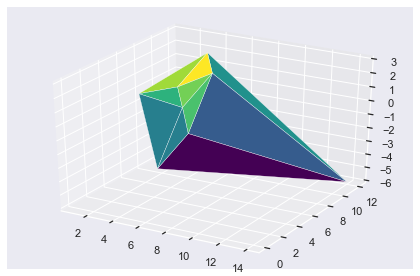

In [341]:
fig = plt.figure() # For plotting
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(p2[:,0], p2[:,1], p2[:,2],cmap='viridis', linewidth=0.3)
fig.tight_layout()

In [329]:
def hyp(simplices,points):
    a = np.array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])
    b = [0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0]
    d = [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0]
    e = [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]
    c=0
    for s in simplices:
        p = list(s)
        p.append(s[0])
        #if a[c]==0:
        #if d[c]==1:
        if e[c]==1:
            print(c)
            for k in range(3):
                x=[points[p[k]][0],points[p[k+1]][0]]
                y=[points[p[k]][1],points[p[k+1]][1]]
                plt.plot(x,y,marker = 'o')
        c+=1
    plt.show()
        

In [330]:
def ppp(f,i):
    l = np.zeros((f.shape[0]+1,f.shape[1]))
    a = ConvexHull(f)
    b = f[a.simplices[i]]
    c = np.mean(b,axis=0)
    d = np.cross(b[1]-b[0],b[2]-b[0])
    print(b)
    print(d)
    print(a.simplices[i])
    
    for k in range(f.shape[0]):
        l[k]=f[k]
    l[-1]=c + 0.001*d
    
    print(l[-1],l[i])
    e = ConvexHull(l)
    g = f.shape[0] in list(e.vertices)
    gg = d[2]>0
    print(g,gg)
    
    if gg * g ==1 or gg+g == 0:
        return True
    return False

2
3
4
6
7
8
9
10
11


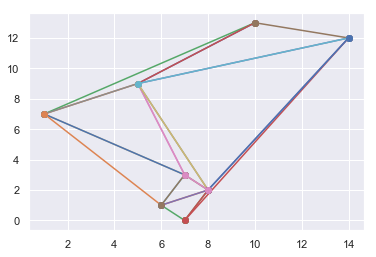

In [333]:
hyp(hull.simplices,f3)